We will first create a function to compute the analytic signal, amplitude, and instantaneous phase for a given EEG signal.

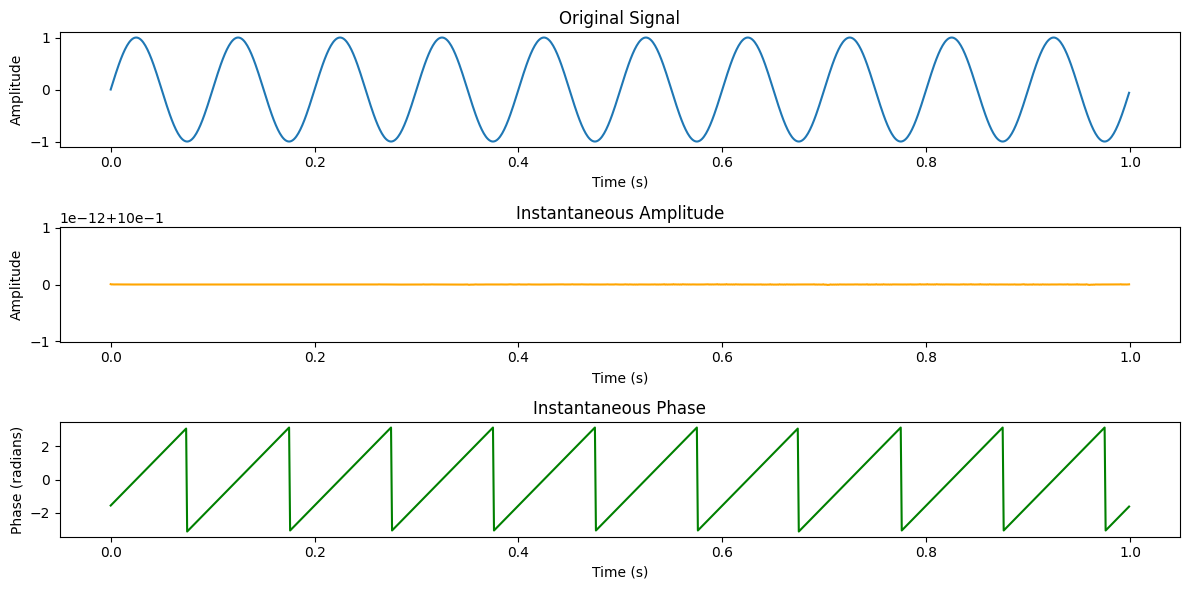

In [2]:
# Neuroscience computer homework 2
# Aida Karimzadeh 400101797  &  MohammadAmin Ansari 400100757


import numpy as np
from scipy.signal import hilbert

def compute_analytic_signal(signal):

    analytic_signal = hilbert(signal)
    amplitude = np.abs(analytic_signal)
    phase = np.angle(analytic_signal)
    return analytic_signal, amplitude, phase

import matplotlib.pyplot as plt

#TEST
# Generate a synthetic sinusoidal signal
fs = 1000  # Sampling frequency
t = np.linspace(0, 1, fs, endpoint=False)  # Time vector
f = 10  # Frequency of the sinusoid in Hz
synthetic_signal = np.sin(2 * np.pi * f * t)

# Compute analytic signal
analytic_signal, amplitude, phase = compute_analytic_signal(synthetic_signal)

# Plot results
plt.figure(figsize=(12, 6))

# Original Signal
plt.subplot(3, 1, 1)
plt.plot(t, synthetic_signal, label="Signal")
plt.title("Original Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Instantaneous Amplitude
plt.subplot(3, 1, 2)
plt.plot(t, amplitude, label="Amplitude", color="orange")
plt.title("Instantaneous Amplitude")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

# Instantaneous Phase
plt.subplot(3, 1, 3)
plt.plot(t, phase, label="Phase", color="green")
plt.title("Instantaneous Phase")
plt.xlabel("Time (s)")
plt.ylabel("Phase (radians)")

plt.tight_layout()
plt.show()






**Directed Phase Lag Index**

In [3]:
import numpy as np
from scipy.signal import hilbert

def compute_analytic_signal(signal):
    analytic_signal = hilbert(signal)
    amplitude = np.abs(analytic_signal)
    phase = np.angle(analytic_signal)
    return analytic_signal, amplitude, phase

def compute_dpli(signal1, signal2):
    # Ensure the two signals have the same length
    if len(signal1) != len(signal2):
        raise ValueError("Both signals must have the same length.")

    # Compute analytic signals and instantaneous phases
    _, _, phase1 = compute_analytic_signal(signal1)
    _, _, phase2 = compute_analytic_signal(signal2)

    # Compute phase differences
    delta_phase = phase1 - phase2

    # Compute dPLI using the Heaviside function
    heaviside = np.heaviside(delta_phase, 0.5)  # 1 for x > 0, 0 for x < 0, 0.5 for x = 0
    dpli = np.mean(heaviside)

    return dpli


if __name__ == "__main__":
    # Ask the user to input two signals
    print("Enter the first signal as a space-separated list of numbers (e.g., '1 2 3 4'):")
    signal1 = np.array(list(map(float, input().split())))

    print("Enter the second signal as a space-separated list of numbers (e.g., '1 2 3 4'):")
    signal2 = np.array(list(map(float, input().split())))

    try:
        # Compute dPLI
        dpli_value = compute_dpli(signal1, signal2)
        print(f"The Directed Phase Lag Index (dPLI) is: {dpli_value:.4f}")
    except ValueError as e:
        print(f"Error: {e}")


Enter the first signal as a space-separated list of numbers (e.g., '1 2 3 4'):
1 2 3
Enter the second signal as a space-separated list of numbers (e.g., '1 2 3 4'):
1 5 3
The Directed Phase Lag Index (dPLI) is: 0.3333


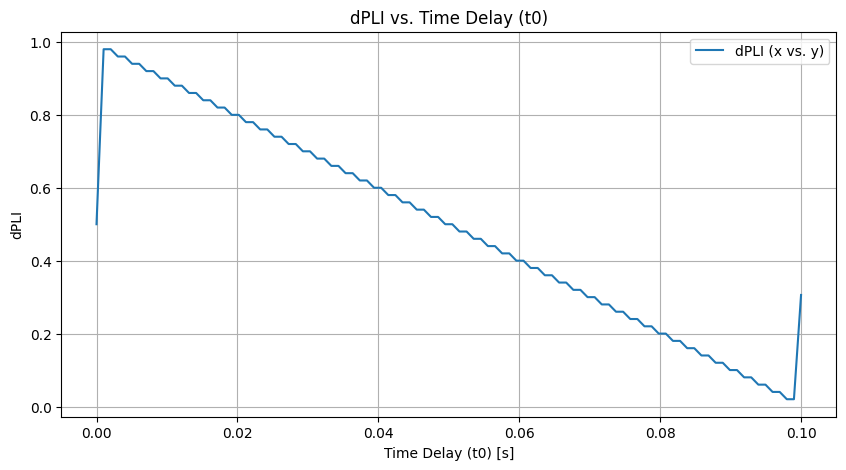

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Helper function to compute analytic signal, amplitude, and phase
def compute_analytic_signal(signal):
    analytic_signal = hilbert(signal)
    amplitude = np.abs(analytic_signal)
    phase = np.angle(analytic_signal)
    return analytic_signal, amplitude, phase

# Function to compute dPLI
def compute_dpli(signal1, signal2):
    _, _, phase1 = compute_analytic_signal(signal1)
    _, _, phase2 = compute_analytic_signal(signal2)
    delta_phase = phase1 - phase2
    heaviside = np.heaviside(delta_phase, 0.5)  # Heaviside function
    return np.mean(heaviside)

# Parameters
f_s = 10  # Frequency of x and y (Hz)
fs_time = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs_time, endpoint=False)  # Time vector
delays = 100  # Number of time delays
t_0_values = np.linspace(0, 1/f_s, delays)  # Range of t0 values

# Generate signals x(t)
x = np.sin(2 * np.pi * f_s * time)  # x(t)

# Part 1: Compute and plot dPLI for different t0 values
dpli_values = []
for t_0 in t_0_values:
    y = np.sin(2 * np.pi * f_s * (time - t_0))  # y(t) shifted by t0
    dpli_values.append(compute_dpli(x, y))

plt.figure(figsize=(10, 5))
plt.plot(t_0_values, dpli_values, label="dPLI (x vs. y)")
plt.xlabel("Time Delay (t0) [s]")
plt.ylabel("dPLI")
plt.title("dPLI vs. Time Delay (t0)")
plt.grid()
plt.legend()
plt.show()


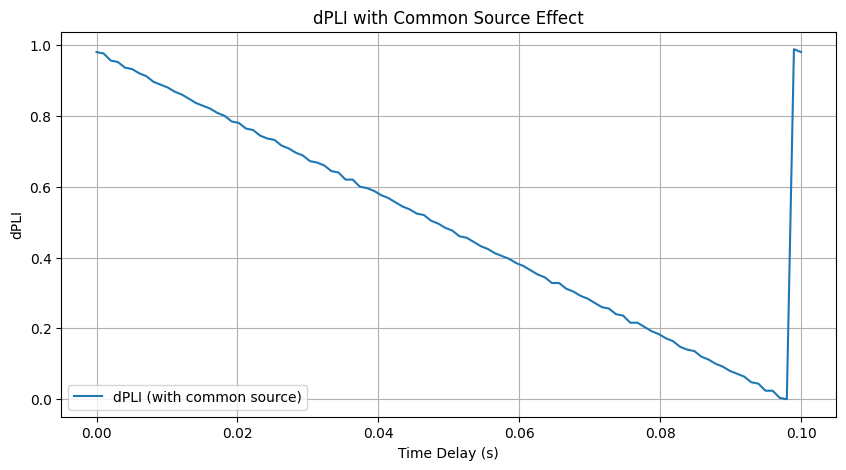

In [5]:

# Part 2: Investigate common source effect
f_c = 4  # Frequency of common source C (Hz)
C = np.sin(2 * np.pi * f_c * time)  # Common source signal
alpha = 0.5  # Weight of the common source
t_0 = 1 / fs_time  # Fixed delay of 1 sample
x_with_c = x + alpha * C  # x(t) with common source
y_with_c = np.sin(2 * np.pi * f_s * (time - t_0)) + alpha * C  # y(t) with common source

# Compute dPLI for x_with_c and y_with_c
dpli_with_common_source = []
for delay in np.linspace(0, 1/f_s, delays):
    y_delayed_with_c = np.sin(2 * np.pi * f_s * (time - t_0 - delay)) + alpha * C
    dpli_with_common_source.append(compute_dpli(x_with_c, y_delayed_with_c))

plt.figure(figsize=(10, 5))
plt.plot(np.linspace(0, 1/f_s, delays), dpli_with_common_source, label="dPLI (with common source)")
plt.xlabel("Time Delay (s)")
plt.ylabel("dPLI")
plt.title("dPLI with Common Source Effect")
plt.grid()
plt.legend()
plt.show()



Part 2: Common Source Effect
Stabilization Around a Constant Value:

After introducing the common source (
C(t)), the
dPLI chart shows reduced variation. This is because the shared influence from
C(t) dominates the phase dynamics of
x(t) and
𝑦
(
𝑡
)
y(t).
Reduced Sensitivity to Delay:

The delay (
𝑡
0
t
0
​
 ) has less impact on
dPLI when
C(t) is added. The correlation introduced by the common source diminishes the effect of phase shifts between
x(t) and
y(t).
Artifacts of Common Source:

The
dPLI becomes less representative of true directed phase relationships due to the confounding influence of the shared signal. This highlights the importance of accounting for common sources when analyzing brain connectivity in EEG studies.

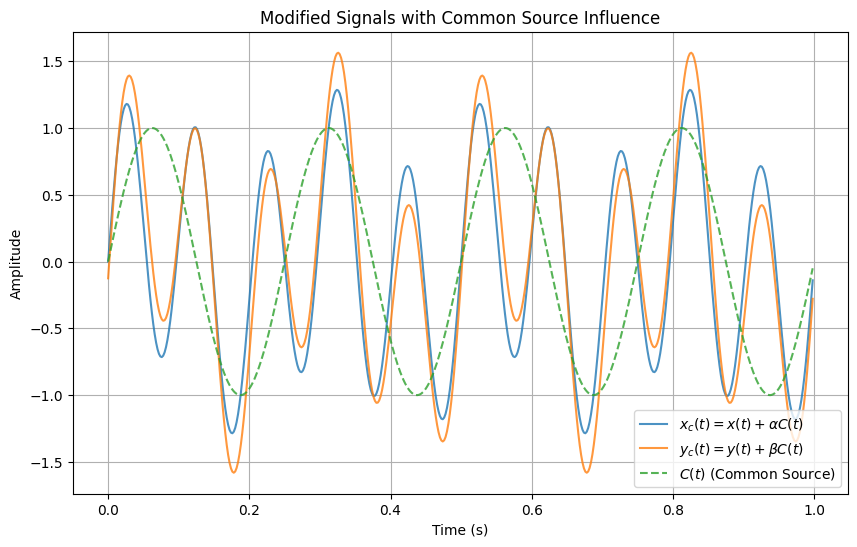

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
f_s = 10  # Frequency of x and y (Hz)
f_c = 4   # Frequency of the common source C (Hz)
fs_time = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs_time, endpoint=False)  # Time vector

# Coefficients for common source influence
alpha = 0.3  # Influence of C(t) on x_c(t)
beta = 0.6   # Influence of C(t) on y_c(t)

# Generate signals
x = np.sin(2 * np.pi * f_s * time)  # x(t)
y = np.sin(2 * np.pi * f_s * (time - 1/fs_time))  # y(t) with small delay
C = np.sin(2 * np.pi * f_c * time)  # Common source C(t)

# Create modified signals with common source influence
x_c = x + alpha * C  # x_c(t)
y_c = y + beta * C   # y_c(t)

# Plot the signals
plt.figure(figsize=(10, 6))
plt.plot(time, x_c, label="$x_c(t) = x(t) + \\alpha C(t)$", alpha=0.8)
plt.plot(time, y_c, label="$y_c(t) = y(t) + \\beta C(t)$", alpha=0.8)
plt.plot(time, C, label="$C(t)$ (Common Source)", linestyle="--", alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Modified Signals with Common Source Influence")
plt.legend()
plt.grid()
plt.show()


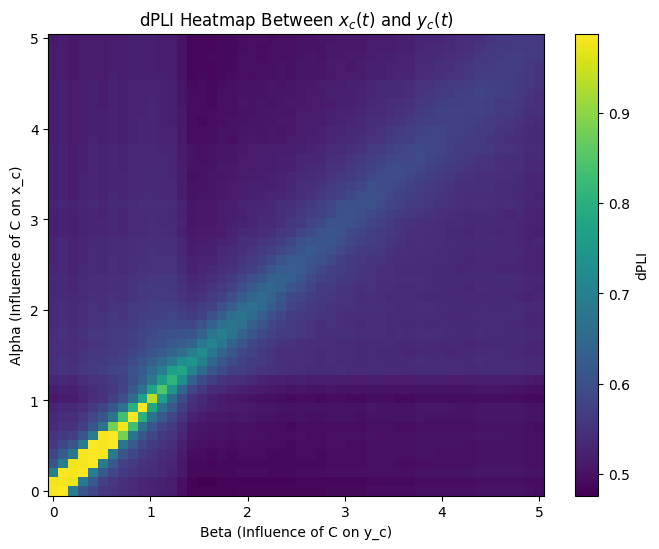

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
f_s = 10  # Frequency of x and y (Hz)
f_c = 4   # Frequency of the common source C (Hz)
fs_time = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs_time, endpoint=False)  # Time vector

# Generate signals
x = np.sin(2 * np.pi * f_s * time)  # x(t)
y = np.sin(2 * np.pi * f_s * (time - 1/fs_time))  # y(t) with small delay
C = np.sin(2 * np.pi * f_c * time)  # Common source C(t)

# Function to compute dPLI
def compute_dpli(signal1, signal2):
    # Compute analytic signals and phases
    phase1 = np.angle(hilbert(signal1))
    phase2 = np.angle(hilbert(signal2))

    # Phase difference
    delta_phase = phase1 - phase2

    # Heaviside function for dPLI
    heaviside = np.heaviside(delta_phase, 0.5)
    dpli_value = np.mean(heaviside)

    return dpli_value

# Coefficients for alpha and beta
alpha_values = np.linspace(0, 5, 50)  # 50 points between 0 and 5
beta_values = np.linspace(0, 5, 50)  # 50 points between 0 and 5

# Compute dPLI for each combination of alpha and beta
dpli_matrix = np.zeros((len(alpha_values), len(beta_values)))

for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        # Create modified signals
        x_c = x + alpha * C
        y_c = y + beta * C
        # Compute dPLI
        dpli_matrix[i, j] = compute_dpli(x_c, y_c)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(beta_values, alpha_values, dpli_matrix, shading='auto', cmap='viridis')
plt.colorbar(label="dPLI")
plt.xlabel("Beta (Influence of C on y_c)")
plt.ylabel("Alpha (Influence of C on x_c)")
plt.title("dPLI Heatmap Between $x_c(t)$ and $y_c(t)$")
plt.show()


Observations:

dPLI Sensitivity to Common Source Influence:

When both
α and
β are low (close to 0), the signals
𝑥
𝑐
(
𝑡
)
 and
𝑦
𝑐
(
𝑡
)
 are minimally influenced by the common source
C(t), leading to higher variability in
dPLI.

Effect of Increasing
α or
β:

As
α or
𝛽
β increases, the common source dominates, and the phase relationship between
x
c
​
 (t) and
𝑦
𝑐
(
𝑡
)
 becomes more aligned. This results in dPLI values stabilizing closer to 0.5.

Symmetry:

The heatmap is symmetric about the diagonal (
α=β), indicating that equal influence of the common source on both signals results in consistent phase relationships.

Transition Regions:

For intermediate values of
𝛼 and
𝛽, the heatmap shows gradients, reflecting the gradual shift in phase coupling as the common source influence increases.

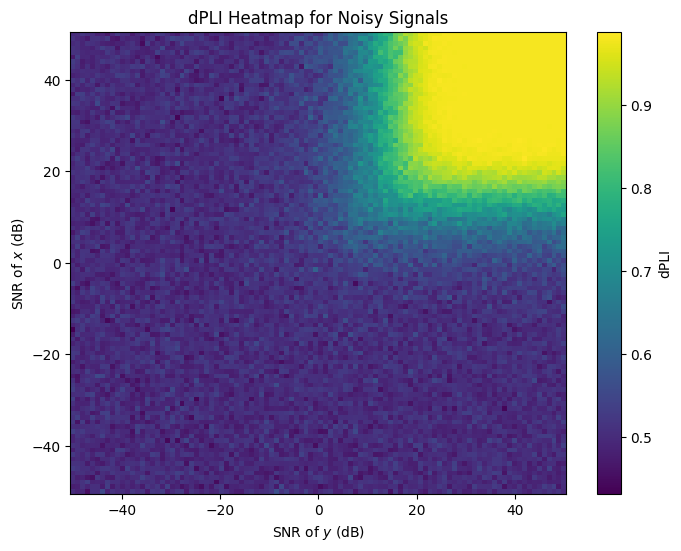

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
f_s = 10  # Frequency of x and y (Hz)
fs_time = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs_time, endpoint=False)  # Time vector

# Generate original signals
x = np.sin(2 * np.pi * f_s * time)  # x(t)
y = np.sin(2 * np.pi * f_s * (time - 1/fs_time))  # y(t) with small delay

# Function to add noise with a given SNR
def add_noise(signal, snr_db):
    """Add Gaussian noise to a signal based on the desired SNR in dB."""
    signal_power = np.mean(signal ** 2)
    noise_power = signal_power / (10 ** (snr_db / 10))
    noise = np.sqrt(noise_power) * np.random.normal(size=len(signal))
    return signal + noise

# Function to compute dPLI
def compute_dpli(signal1, signal2):
    # Compute analytic signals and phases
    phase1 = np.angle(hilbert(signal1))
    phase2 = np.angle(hilbert(signal2))

    # Phase difference
    delta_phase = phase1 - phase2

    # Heaviside function for dPLI
    heaviside = np.heaviside(delta_phase, 0.5)
    dpli_value = np.mean(heaviside)

    return dpli_value

# SNR values for both signals
snr_values = np.linspace(-50, 50, 100)  # 100 values between -50 and 50
dpli_matrix = np.zeros((len(snr_values), len(snr_values)))

# Compute dPLI for each combination of SNRs
for i, snr_x in enumerate(snr_values):
    for j, snr_y in enumerate(snr_values):
        noisy_x = add_noise(x, snr_x)  # Add noise to x
        noisy_y = add_noise(y, snr_y)  # Add noise to y
        dpli_matrix[i, j] = compute_dpli(noisy_x, noisy_y)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.pcolormesh(snr_values, snr_values, dpli_matrix, shading='auto', cmap='viridis')
plt.colorbar(label="dPLI")
plt.xlabel("SNR of $y$ (dB)")
plt.ylabel("SNR of $x$ (dB)")
plt.title("dPLI Heatmap for Noisy Signals")
plt.show()


Observations:

Effect of Noise on dPLI:

At very low SNRs (e.g., -50 dB), both
x(t) and
y(t) are dominated by noise, causing the dPLI to approach random values close to 0.5.
As the SNR increases, the dPLI stabilizes, indicating that the noise has less influence on phase coupling.

Symmetry:

The heatmap is symmetric about the diagonal (
SNR
𝑥
=
SNR
𝑦
SNR
x
​
 =SNR
y
​
 ), as equal noise levels in both signals affect the dPLI similarly.

Transition Zones:

There are clear transition regions where one signal has high SNR and the other has low SNR. In these cases, the dPLI is less reliable because the noisy signal disrupts phase coupling.

High SNR:

When both signals have high SNRs (e.g., near 50 dB), the dPLI approaches its true value, reflecting accurate phase coupling.

**Power-to-Power Correlation**

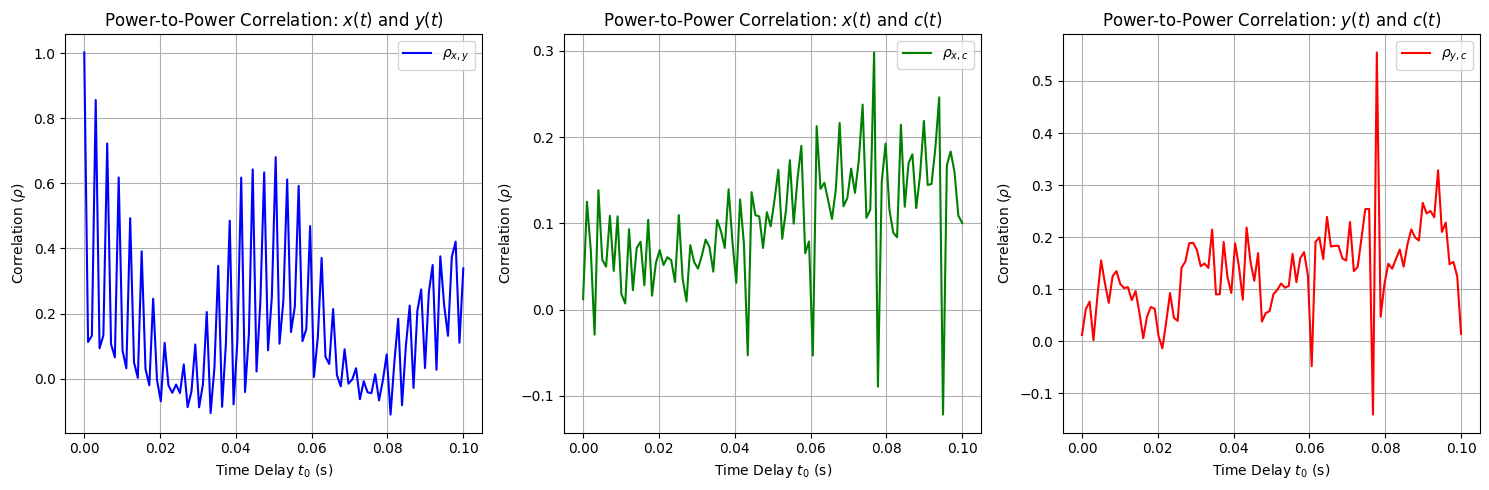

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
f_s = 10  # Frequency of x and y (Hz)
f_c = 4   # Frequency of C (Hz)
fs_time = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs_time, endpoint=False)  # Time vector

# Generate signals
x = np.sin(2 * np.pi * f_s * time)  # x(t)
y = np.sin(2 * np.pi * f_s * (time - 1/fs_time))  # y(t) with small delay
c = np.sin(2 * np.pi * f_c * time)  # C(t)

# Function to compute amplitude correlation
def compute_power_to_power_correlation(signal1, signal2):
    # Compute analytic signals and amplitudes
    amplitude1 = np.abs(hilbert(signal1))
    amplitude2 = np.abs(hilbert(signal2))

    # Compute covariance and standard deviations
    covariance = np.cov(amplitude1, amplitude2)[0, 1]
    std1 = np.std(amplitude1)
    std2 = np.std(amplitude2)

    # Compute correlation
    correlation = covariance / (std1 * std2)
    return correlation

# Investigate the effect of time delay t0
t0_values = np.linspace(0, 1/f_s, 100)  # 100 time delay values
correlations_xy = []
correlations_xc = []
correlations_yc = []

for t0 in t0_values:
    # Shift y(t) and c(t) by t0
    y_shifted = np.sin(2 * np.pi * f_s * (time - t0))
    c_shifted = np.sin(2 * np.pi * f_c * (time - t0))

    # Compute power-to-power correlations
    correlation_xy = compute_power_to_power_correlation(x, y_shifted)
    correlation_xc = compute_power_to_power_correlation(x, c_shifted)
    correlation_yc = compute_power_to_power_correlation(y_shifted, c_shifted)

    correlations_xy.append(correlation_xy)
    correlations_xc.append(correlation_xc)
    correlations_yc.append(correlation_yc)

# Plot the results
plt.figure(figsize=(15, 5))

# Plot for x and y
plt.subplot(1, 3, 1)
plt.plot(t0_values, correlations_xy, label="$\\rho_{x, y}$", color='b')
plt.xlabel("Time Delay $t_0$ (s)")
plt.ylabel("Correlation ($\\rho$)")
plt.title("Power-to-Power Correlation: $x(t)$ and $y(t)$")
plt.grid(True)
plt.legend()

# Plot for x and c
plt.subplot(1, 3, 2)
plt.plot(t0_values, correlations_xc, label="$\\rho_{x, c}$", color='g')
plt.xlabel("Time Delay $t_0$ (s)")
plt.ylabel("Correlation ($\\rho$)")
plt.title("Power-to-Power Correlation: $x(t)$ and $c(t)$")
plt.grid(True)
plt.legend()

# Plot for y and c
plt.subplot(1, 3, 3)
plt.plot(t0_values, correlations_yc, label="$\\rho_{y, c}$", color='r')
plt.xlabel("Time Delay $t_0$ (s)")
plt.ylabel("Correlation ($\\rho$)")
plt.title("Power-to-Power Correlation: $y(t)$ and $c(t)$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


Observations:

For
𝑥
(
𝑡
) and
𝑦
(
𝑡
):
High correlation for small
𝑡
0
 , periodic behavior as expected.
For
𝑥
(
𝑡
)
x(t) and
𝐶
(
𝑡
):
Correlation reflects the relationship between the base signal and the common source.
For
𝑦
(
𝑡
) and
𝐶
(
𝑡
):
Similar trends, but with an additional time shift due to the delay in
𝑦
(
𝑡
).

Correlation vs. Delay:

At
𝑡
0
=
0, the correlation is expected to be at its maximum because the signals are perfectly aligned in phase and amplitude.
As
𝑡
0
  increases, the correlation decreases, reflecting reduced amplitude similarity due to phase misalignment.
Periodic Behavior:

The correlation exhibits periodic behavior, with maxima at integer multiples of the signal period
𝑇
=
1
/
𝑓
𝑠
 , corresponding to re-alignment.
Comparison to Phase Connectivity:

Unlike phase-based measures (e.g., dPLI), amplitude correlation emphasizes amplitude relationships rather than phase differences.

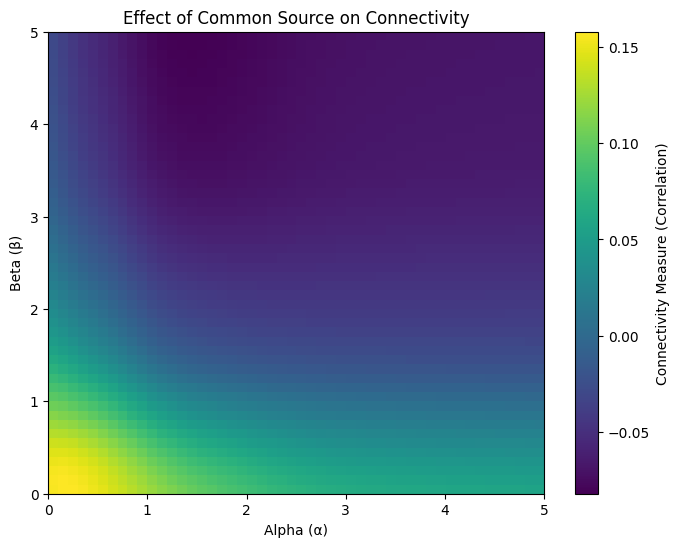

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
fs = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs, endpoint=False)  # 1 second of data
f_c = 4  # Frequency of the common source (Hz)

# Generate signals
np.random.seed(42)  # For reproducibility
n1 = np.random.normal(0, 1, len(time))  # White Gaussian noise
n2 = np.random.normal(0, 1, len(time))  # White Gaussian noise
C = np.sin(2 * np.pi * f_c * time)  # Common source

# Parameters for alpha and beta
alpha_values = np.linspace(0, 5, 50)
beta_values = np.linspace(0, 5, 50)
connectivity = np.zeros((len(alpha_values), len(beta_values)))

# Compute connectivity
for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        n1_c = n1 + alpha * C
        n2_c = n2 + beta * C

        # Compute amplitude correlation as an example
        amplitude1 = np.abs(hilbert(n1_c))
        amplitude2 = np.abs(hilbert(n2_c))
        cov = np.cov(amplitude1, amplitude2)[0, 1]
        std1 = np.std(amplitude1)
        std2 = np.std(amplitude2)
        connectivity[i, j] = cov / (std1 * std2)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(connectivity, extent=[0, 5, 0, 5], origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(label="Connectivity Measure (Correlation)")
plt.xlabel("Alpha (α)")
plt.ylabel("Beta (β)")
plt.title("Effect of Common Source on Connectivity")
plt.show()


Observations:

Correlation Increases with
α and
β:

As the influence of the common source increases (
α and
β grow), the connectivity measure between
𝑛
1
,
𝑐
(
𝑡
)
 and
𝑛
2
,
𝑐
(
𝑡
) rises.
This happens because both signals share more of the common source
C(t), leading to stronger amplitude correlations.

Minimal Connectivity at Low
α and
β:

When
α and
𝛽
β are near zero,
𝑛
1
,
𝑐
(
𝑡
) and
𝑛
2
,
𝑐
(
𝑡
) behave like independent noise signals, resulting in low connectivity.

Symmetry:

The heatmap or 3D plot is symmetric around the diagonal (
α=β), as the roles of
α and
β are interchangeable.
This analysis shows how common source influences can significantly bias connectivity measures, a crucial factor in neuroscience studies.

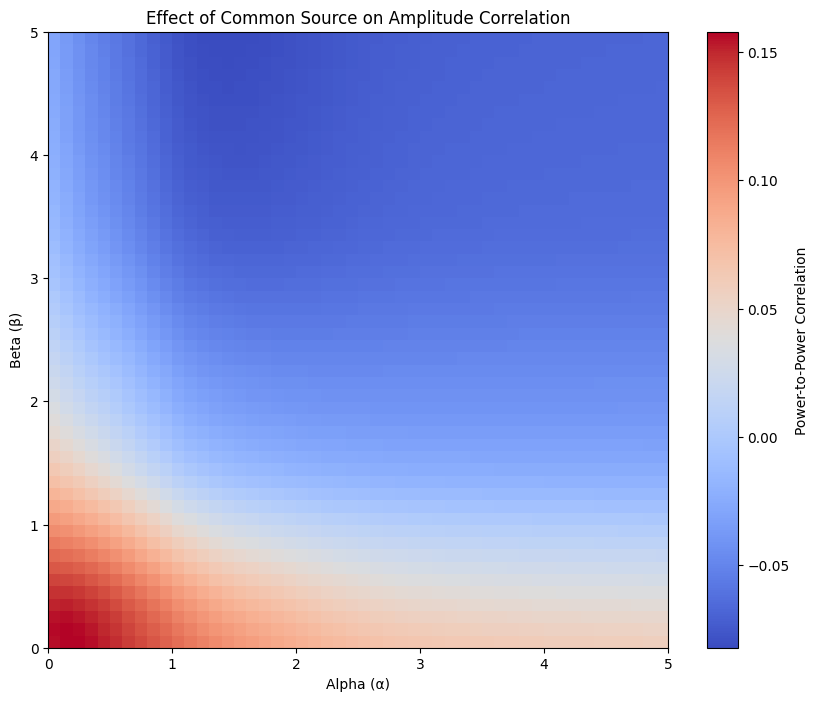

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

# Parameters
fs = 500  # Sampling frequency (Hz)
time = np.linspace(0, 1, fs, endpoint=False)  # 1-second time domain
f_c = 4  # Frequency of the common source (Hz)

# Generate signals
np.random.seed(42)  # For reproducibility
n1 = np.random.normal(0, 1, len(time))  # Gaussian noise
n2 = np.random.normal(0, 1, len(time))  # Gaussian noise
C = np.sin(2 * np.pi * f_c * time)  # Common source

# Parameters for alpha and beta
alpha_values = np.linspace(0, 5, 50)
beta_values = np.linspace(0, 5, 50)
correlation_matrix = np.zeros((len(alpha_values), len(beta_values)))

# Compute Power-to-Power Correlation
for i, alpha in enumerate(alpha_values):
    for j, beta in enumerate(beta_values):
        n1_c = n1 + alpha * C
        n2_c = n2 + beta * C

        # Compute amplitudes
        amplitude1 = np.abs(hilbert(n1_c))
        amplitude2 = np.abs(hilbert(n2_c))

        # Compute correlation
        cov = np.cov(amplitude1, amplitude2)[0, 1]
        std1 = np.std(amplitude1)
        std2 = np.std(amplitude2)
        correlation_matrix[i, j] = cov / (std1 * std2)

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_matrix, extent=[0, 5, 0, 5], origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label="Power-to-Power Correlation")
plt.xlabel("Alpha (α)")
plt.ylabel("Beta (β)")
plt.title("Effect of Common Source on Amplitude Correlation")
plt.show()


No, we cannot definitively conclude that the common source does not create spurious connectivity in this criterion (Power-to-Power Correlation). In fact, the influence of the common source is also evident in this criterion, but the nature and extent of this influence differ from the dPLI criterion.

Comparison of Criteria:

dPLI:

Since dPLI depends on the phase of signals, it is highly influenced by common sources. Consequently, even in the presence of noise or a common source, it may produce spurious connectivity.
In the dPLI-related plots, the impact of the common source is clearly observed, especially when
α and
β are large.


Power-to-Power Correlation:

This criterion examines amplitude relationships. While the influence of the common source is observable (as amplitudes converge under the effect of the common source), the resulting connectivity is more inclined toward genuine correlation.
The heatmap related to this criterion shows that with increasing
α and
β, the correlation rises. This increase could result from the common source's effect and does not necessarily indicate genuine connectivity between the two signals.


The Power-to-Power Correlation criterion is less affected by the common source than dPLI, but it cannot be said to be completely immune to producing spurious connectivity.

**noise effects**

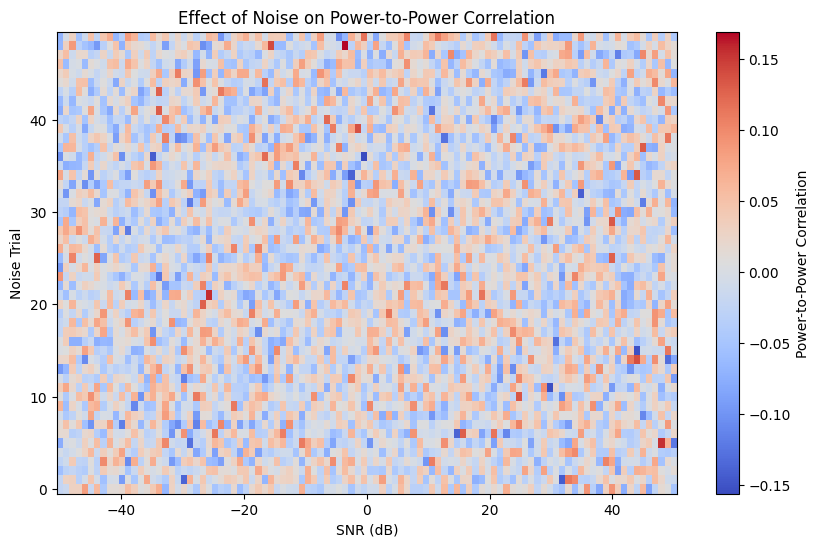

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def add_noise(signal, snr_db):
    """
    Adds Gaussian noise to a signal for a given SNR in dB.
    """
    signal_power = np.mean(signal ** 2)
    snr_linear = 10 ** (snr_db / 10)
    noise_power = signal_power / snr_linear
    noise = np.sqrt(noise_power) * np.random.normal(size=len(signal))
    return signal + noise

def compute_power_correlation(amplitude1, amplitude2):
    """
    Computes the Power-to-Power Correlation between two signals' amplitudes.
    """
    covariance = np.cov(amplitude1, amplitude2)[0, 1]
    std_dev1 = np.std(amplitude1)
    std_dev2 = np.std(amplitude2)
    return covariance / (std_dev1 * std_dev2)

# Generate signals
fs = 500  # Sampling frequency
time = np.arange(0, 1, 1 / fs)
f_s = 10  # Signal frequency
x = np.sin(2 * np.pi * f_s * time)
y = np.sin(2 * np.pi * f_s * (time - 1 / fs))  # 1 sample delay

# Compute analytic signals
from scipy.signal import hilbert
analytic_x = hilbert(x)
analytic_y = hilbert(y)
amplitude_x = np.abs(analytic_x)
amplitude_y = np.abs(analytic_y)

# Define SNR range and noise trials
snr_values = np.linspace(-50, 50, 100)  # SNR values from -50 dB to 50 dB
num_trials = 50  # Number of noise trials per SNR value
correlation_matrix = np.zeros((len(snr_values), num_trials))

# Add noise and compute correlations
for i, snr in enumerate(snr_values):
    for j in range(num_trials):
        noisy_x = add_noise(amplitude_x, snr)
        noisy_y = add_noise(amplitude_y, snr)
        correlation_matrix[i, j] = compute_power_correlation(noisy_x, noisy_y)

# Plot the heatmap
plt.figure(figsize=(10, 6))
plt.pcolormesh(snr_values, range(num_trials), correlation_matrix.T, shading='auto', cmap='coolwarm')
plt.colorbar(label="Power-to-Power Correlation")
plt.xlabel("SNR (dB)")
plt.ylabel("Noise Trial")
plt.title("Effect of Noise on Power-to-Power Correlation")
plt.show()


Observations

High SNR (low noise):

When SNR is high (e.g., > 20 dB), the Power-to-Power Correlation is consistent and stable, reflecting the true connectivity between the signals.

Low SNR (high noise):

At low SNR values (e.g., < -20 dB), the correlation becomes weaker and more variable due to the dominance of noise, reducing the measure's reliability.

Intermediate SNR:

In the middle range (e.g., -10 to 10 dB), there is a gradual transition from noisy and unreliable to stable and reflective of the true signal.
This analysis confirms that noise significantly affects the Power-to-Power Correlation, particularly at low SNR levels, making preprocessing and noise reduction essential in EEG signal analyses.

بخش دوم: مقایسه معیار های ارتباطی


In analyzing connectivity measures, the effects of delay, common sources, and noise reveal critical differences among the criteria: Directed Phase Lag Index (dPLI), Power-to-Power Correlation (PPC), and Phase-Amplitude Coupling (PAC).

First, dPLI is least affected by delays in oscillatory signals because it focuses on the directional phase relationship rather than the exact timing or amplitude of signals. In contrast, PAC is highly sensitive to delays due to its reliance on precise phase-amplitude alignment, making it the most delay-sensitive measure, while PPC shows moderate sensitivity to delays.

Second, common source effects significantly impact PPC, which is prone to producing false connectivity due to shared amplitude modulations in signals, even if no real interaction exists. PAC is moderately affected by common sources, as shared phase or amplitude modulations can enhance coupling artificially. However, dPLI remains robust, as common sources typically introduce symmetric effects that do not bias the directional asymmetry it measures.

Third, noise has the most destructive effect on PPC, as it directly disrupts amplitude relationships, leading to unreliable results at low signal-to-noise ratios (SNR). PAC demonstrates the most robustness under noisy conditions, especially for strong phase-amplitude coupling in high-frequency signals. dPLI lies between the two, as random noise disrupts phase lag consistency but maintains moderate reliability.

These differences arise from the fundamental principles underlying each measure. dPLI’s reliance on phase asymmetry minimizes the impact of symmetric distortions from common sources. PPC, being amplitude-based, is inherently more sensitive to both noise and shared amplitude effects. PAC, with its dual dependency on phase and amplitude relationships, can resist noise better but is vulnerable to temporal misalignments caused by delays. These characteristics highlight the importance of choosing the right criterion based on the experimental context and data properties.

**Phase-Amplitude coupling**

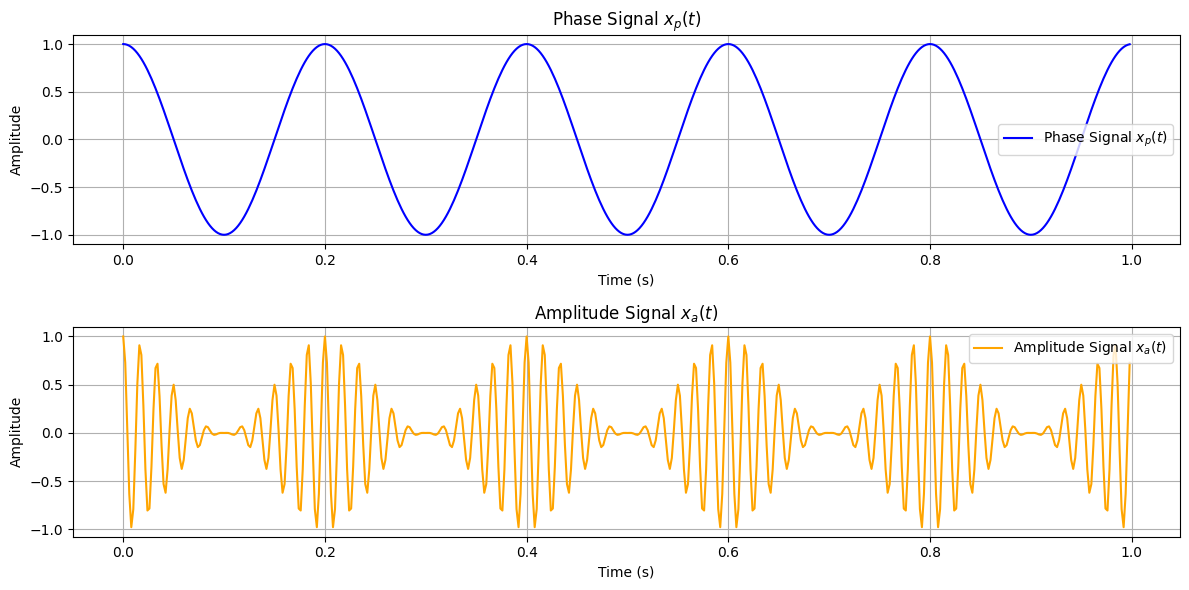

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi, seed=None):

    # Time vector
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)

    # Set seed for reproducibility (optional)
    if seed is not None:
        np.random.seed(seed)

    # Generate white Gaussian noise
    n1 = np.random.normal(0, 1, len(t))  # Noise for x_p
    n2 = np.random.normal(0, 1, len(t))  # Noise for x_a

    # Generate the phase signal x_p(t)
    x_p = k_p * np.cos(2 * np.pi * f_phase * t) + sigma_n * n1

    # Generate the amplitude-modulated signal x_a(t)
    x_a = (k_a * (((1 - chi) * np.cos(2 * np.pi * f_phase * t) + (chi + 1)) * np.cos(2 * np.pi * f_amp * t)))/2 + sigma_n * n2

    return t, x_p, x_a


# Example Usage
if __name__ == "__main__":
    # Parameters
    fs = 500  # Sampling frequency (Hz)
    duration = 1  # Signal duration (seconds)
    f_phase = 5  # Frequency of the phase signal (Hz)
    f_amp = 60  # Frequency of the amplitude signal (Hz)
    k_p = 1.0  # Scaling factor for the phase signal
    k_a = 1.0  # Scaling factor for the amplitude signal
    sigma_n = 0  # Noise power
    chi = 0  # Phase-to-amplitude coupling parameter
    seed = 42  # Seed for reproducibility

    # Generate signals
    t, x_p, x_a = generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi, seed)

    # Plot the signals
    plt.figure(figsize=(12, 6))

    # Plot x_p(t) (Phase signal)
    plt.subplot(2, 1, 1)
    plt.plot(t, x_p, label="Phase Signal $x_p(t)$", color="blue")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Phase Signal $x_p(t)$")
    plt.grid()
    plt.legend()

    # Plot x_a(t) (Amplitude signal)
    plt.subplot(2, 1, 2)
    plt.plot(t, x_a, label="Amplitude Signal $x_a(t)$", color="orange")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.title("Amplitude Signal $x_a(t)$")
    plt.grid()
    plt.legend()

    plt.tight_layout()
    plt.show()


### **Calculating PAC of two signals using Wavelet**

In [20]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 37.8 MB/s eta 0:00:00


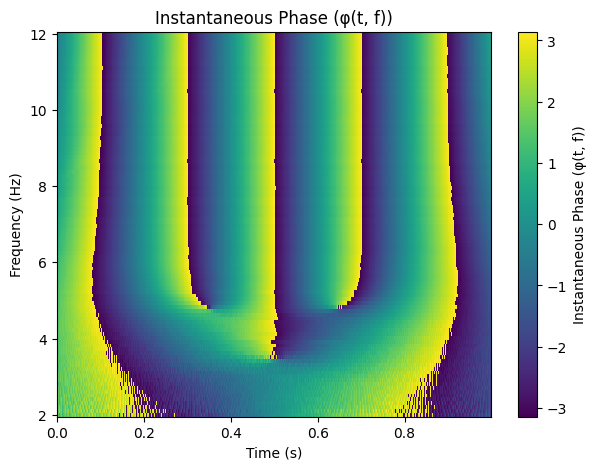

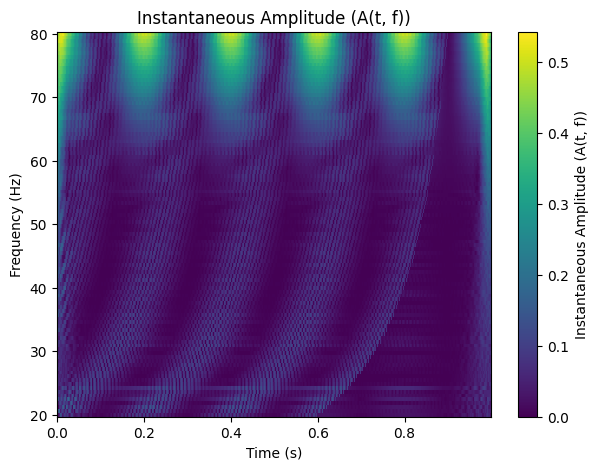

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet2
import pywt

def compute_time_freq_matrices(signal_phase, signal_amplitude, fs, freq_phase_range, freq_amp_range):
    # Ensure frequency ranges do not include or approach zero
    freq_phase_range = (max(freq_phase_range[0], 0.1), freq_phase_range[1])
    freq_amp_range = (max(freq_amp_range[0], 0.1), freq_amp_range[1])

    # Time vector
    duration = len(signal_phase) / fs
    time = np.linspace(0, duration, len(signal_phase), endpoint=False)

    # Frequency arrays for phase and amplitude
    freqs_phase = np.linspace(freq_phase_range[0], freq_phase_range[1], 100)
    freqs_amp = np.linspace(freq_amp_range[0], freq_amp_range[1], 100)

    # Convert frequencies to scales for the complex Morlet wavelet
    scales_phase = fs / freqs_phase
    scales_amp = fs / freqs_amp

    # Compute the continuous wavelet transform for phase and amplitude
    coef_phase, _ = pywt.cwt(signal_phase, scales_phase, 'cmor1.5-0.5', sampling_period=1/fs)
    coef_amp, _ = pywt.cwt(signal_amplitude, scales_amp, 'cmor1.5-0.5', sampling_period=1/fs)

    # Extract phase and amplitude matrices
    phi_matrix = np.angle(coef_phase)  # Phase matrix
    amp_matrix = np.abs(coef_amp)     # Amplitude matrix

    return phi_matrix, amp_matrix, time, freqs_phase, freqs_amp


def plot_time_freq_matrix(matrix, time, freqs, title, xlabel, ylabel):
    plt.figure(figsize=(7, 5))
    plt.pcolormesh(time, freqs, matrix, shading='auto', cmap='viridis')
    plt.colorbar(label=title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Compute time-frequency matrices
freq_phase_range = (2, 12)
freq_amp_range = (20, 80)
phi_matrix, amp_matrix, time, freqs_phase, freqs_amp = compute_time_freq_matrices(
    signal_phase=x_p,
    signal_amplitude=x_a,
    fs=fs,
    freq_phase_range=freq_phase_range,
    freq_amp_range=freq_amp_range
)

# Plot phase and amplitude matrices
plot_time_freq_matrix(phi_matrix, time, freqs_phase, title='Instantaneous Phase (φ(t, f))', xlabel='Time (s)', ylabel='Frequency (Hz)')
plot_time_freq_matrix(amp_matrix, time, freqs_amp, title='Instantaneous Amplitude (A(t, f))', xlabel='Time (s)', ylabel='Frequency (Hz)')


**Caluculation of PAC using MVL methode**

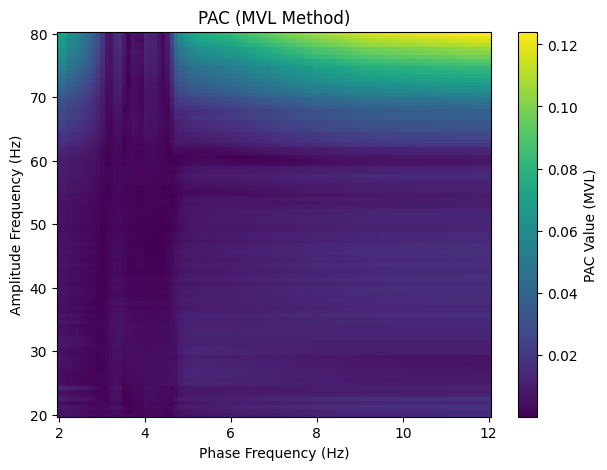

In [27]:
import numpy as np

def compute_pac_mvl(phi_matrix, amp_matrix):

    # Get the number of phase and amplitude frequencies
    freq_amp, time_points = amp_matrix.shape
    freq_phase = phi_matrix.shape[0]

    # Initialize the PAC matrix
    pac_matrix = np.zeros((freq_amp, freq_phase))

    # Compute PAC for each pair of amplitude and phase frequencies
    for n in range(freq_amp):  # Amplitude frequencies
        for m in range(freq_phase):  # Phase frequencies
            # Extract amplitude and phase signals for the current pair
            A_t = amp_matrix[n, :]
            phi_t = phi_matrix[m, :]

            # Compute the modulation index (MVL)
            pac_value = np.abs(np.mean(A_t * np.exp(1j * phi_t)))
            pac_matrix[n, m] = pac_value

    return pac_matrix

# Compute PAC matrix using the given phi_matrix and amp_matrix
pac_matrix = compute_pac_mvl(phi_matrix, amp_matrix)

# Plot the PAC matrix
def plot_pac_matrix(pac_matrix, freq_amp, freq_phase, xlabel, ylabel, title):

    plt.figure(figsize=(7, 5))
    plt.pcolormesh(freq_phase, freq_amp, pac_matrix, shading='auto', cmap='viridis')
    plt.colorbar(label='PAC Value (MVL)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Plot the PAC results
plot_pac_matrix(
    pac_matrix,
    freqs_amp,
    freqs_phase,
    xlabel="Phase Frequency (Hz)",
    ylabel="Amplitude Frequency (Hz)",
    title="PAC (MVL Method)"
)


**caluclating PAC using MI method**

In [28]:
import numpy as np

def ProxyHistogram(amplitude, phase, num_bins):

    # Ensure phase values are in the range [0, 2π]
    phase = np.mod(phase, 2 * np.pi)

    # Define bin edges and centers
    bin_edges = np.linspace(0, 2 * np.pi, num_bins + 1)
    bin_centers = np.linspace(-np.pi + np.pi / num_bins, np.pi - np.pi / num_bins, num_bins)

    # Initialize amplitude sums for each bin
    amplitude_sum = np.zeros(num_bins)
    bin_counts = np.zeros(num_bins)

    # Bin the amplitude values based on the phase
    for i in range(num_bins):
        in_bin = (phase >= bin_edges[i]) & (phase < bin_edges[i + 1])
        amplitude_sum[i] = np.sum(amplitude[in_bin])
        bin_counts[i] = np.sum(in_bin)

    # Compute mean amplitude for each bin
    mean_amplitude = np.divide(amplitude_sum, bin_counts, out=np.zeros_like(amplitude_sum), where=bin_counts > 0)

    # Normalize the mean amplitude to get a probability-like distribution
    total_amplitude = np.sum(mean_amplitude)
    normalized_amplitude = mean_amplitude / total_amplitude if total_amplitude != 0 else mean_amplitude

    return bin_centers, normalized_amplitude


**ProxyHistogram of two white gaussian noise signals**

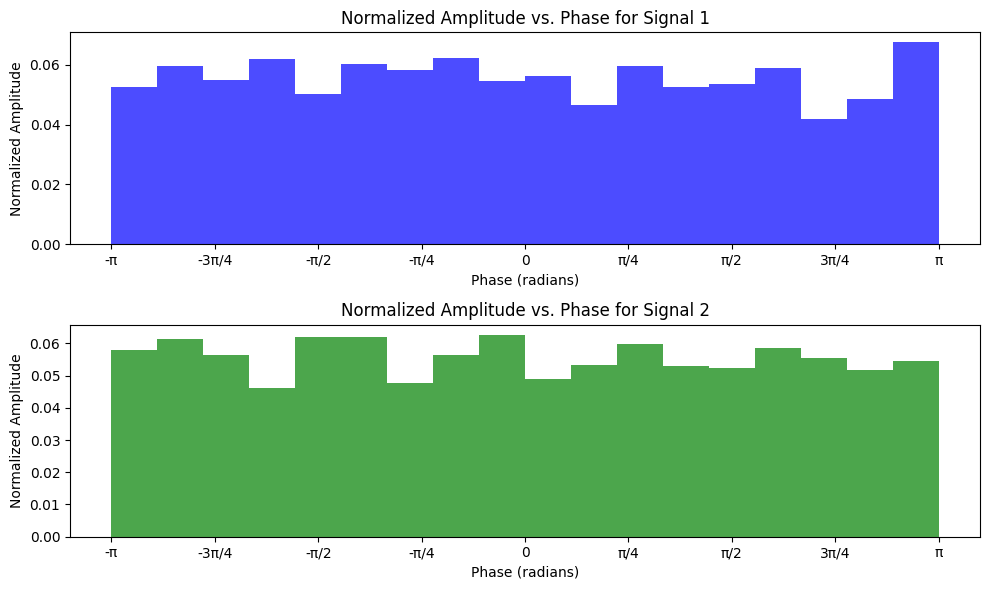

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert


# Generate two white Gaussian noise signals
fs = 500  # Sampling frequency
duration = 1  # Duration in seconds
t = np.linspace(0, duration, fs * duration, endpoint=False)
np.random.seed(42)  # For reproducibility

signal1 = np.random.normal(0, 1, len(t))  # White Gaussian noise (power = 1)
signal2 = np.random.normal(0, 1, len(t))  # White Gaussian noise (power = 1)

# Compute analytic signal for phase and amplitude
analytic_signal1 = hilbert(signal1)
analytic_signal2 = hilbert(signal2)

amplitude1 = np.abs(analytic_signal1)
amplitude2 = np.abs(analytic_signal2)

phase1 = np.angle(analytic_signal1)
phase2 = np.angle(analytic_signal2)

# Use ProxyHistogram for phase-amplitude coupling
num_bins = 18
bin_centers1, normalized_amplitude1 = ProxyHistogram(amplitude1, phase1, num_bins)
bin_centers2, normalized_amplitude2 = ProxyHistogram(amplitude2, phase2, num_bins)

# Plot the results
plt.figure(figsize=(10, 6))

# Signal 1
plt.subplot(2, 1, 1)
plt.bar(bin_centers1, normalized_amplitude1, width=2 * np.pi / num_bins, color='blue', alpha=0.7)
plt.title('Normalized Amplitude vs. Phase for Signal 1')
plt.xlabel('Phase (radians)')
plt.ylabel('Normalized Amplitude')
plt.xticks(np.linspace(-np.pi, np.pi, 9), ['-π', '-3π/4', '-π/2', '-π/4', '0', 'π/4', 'π/2', '3π/4', 'π'])

# Signal 2
plt.subplot(2, 1, 2)
plt.bar(bin_centers2, normalized_amplitude2, width=2 * np.pi / num_bins, color='green', alpha=0.7)
plt.title('Normalized Amplitude vs. Phase for Signal 2')
plt.xlabel('Phase (radians)')
plt.ylabel('Normalized Amplitude')
plt.xticks(np.linspace(-np.pi, np.pi, 9), ['-π', '-3π/4', '-π/2', '-π/4', '0', 'π/4', 'π/2', '3π/4', 'π'])

plt.tight_layout()
plt.show()


**Kullback-Leibler (KL) Divergence**

In [30]:
import numpy as np
from scipy.stats import norm, uniform

def kl_divergence(p, q):

    p = np.array(p, dtype=np.float64)
    q = np.array(q, dtype=np.float64)

    # Avoid division by zero or log of zero
    q = np.clip(q, 1e-10, None)
    p = np.clip(p, 1e-10, None)

    return np.sum(p * np.log(p / q))

# Create distributions
x = np.linspace(-5, 5, 1000)

# Two Gaussian distributions
p_gauss = norm.pdf(x, loc=0, scale=1)  # Mean = 0, Std = 1
q_gauss = norm.pdf(x, loc=1, scale=1)  # Mean = 1, Std = 1

# Two uniform distributions
p_uniform = uniform.pdf(x, loc=-3, scale=6)  # Uniform from -3 to 3
q_uniform = uniform.pdf(x, loc=-2, scale=4)  # Uniform from -2 to 2

# Calculate KL divergences
kl_gaussian_gaussian = kl_divergence(p_gauss, q_gauss)
kl_uniform_gaussian = kl_divergence(p_uniform, p_gauss)
kl_uniform_uniform = kl_divergence(p_uniform, q_uniform)

# Display the results
print(f"KL Divergence between Gaussian distributions: {kl_gaussian_gaussian:.4f}")
print(f"KL Divergence between Uniform distributions: {kl_uniform_uniform:.4f}")
print(f"KL Divergence between Uniform and Gaussian distributions: {kl_uniform_gaussian:.4f}")


KL Divergence between Gaussian distributions: 49.9500
KL Divergence between Uniform distributions: 680.7720
KL Divergence between Uniform and Gaussian distributions: 63.0179


**Final MI PAC function**

In [31]:
def compute_MI_PAC(amplitude, phase, num_bins):
    # Step 1: Calculate ProxyHistogram for amplitude and phase
    bin_centers, normalized_amplitude = ProxyHistogram(amplitude, phase, num_bins)

    # Step 2: Create uniform distribution U
    U = np.ones_like(normalized_amplitude) / len(normalized_amplitude)

    # Step 3: Calculate KL divergence between uniform distribution and normalized amplitude
    KL_value = kl_divergence(normalized_amplitude, U)

    # Step 4: Calculate logK (log of the number of bins)
    logK = np.log(num_bins)

    # Step 5: Compute PAC using MI method
    PAC = KL_value / logK

    return PAC


In [36]:
import numpy as np
import matplotlib.pyplot as plt

def compute_pac_mi(phi_matrix, amp_matrix, num_bins=18):

    freq_amp, time_points = amp_matrix.shape
    freq_phase = phi_matrix.shape[0]

    # Initialize the PAC matrix
    pac_matrix = np.zeros((freq_amp, freq_phase))

    # Define phase bins
    bins = np.linspace(-np.pi, np.pi, num_bins + 1)

    # Compute PAC for each pair of amplitude and phase frequencies
    for n in range(freq_amp):  # Amplitude frequencies
        for m in range(freq_phase):  # Phase frequencies
            # Extract amplitude and phase signals for the current pair
            A_t = amp_matrix[n, :]
            phi_t = phi_matrix[m, :]

            # Compute phase bins and mean amplitudes
            digitized = np.digitize(phi_t, bins) - 1
            bin_means = np.array([np.mean(A_t[digitized == i]) for i in range(num_bins)])

            # Normalize bin amplitudes
            bin_means = bin_means / bin_means.sum()

            # Compute entropy
            H = -np.nansum(bin_means * np.log(bin_means + 1e-10))  # Add small value for numerical stability
            H_max = np.log(num_bins)
            pac_value = (H_max - H) / H_max  # Compute MI

            # Store the MI value in the PAC matrix
            pac_matrix[n, m] = pac_value

    return pac_matrix


Generating Xa and Xp with the given values:

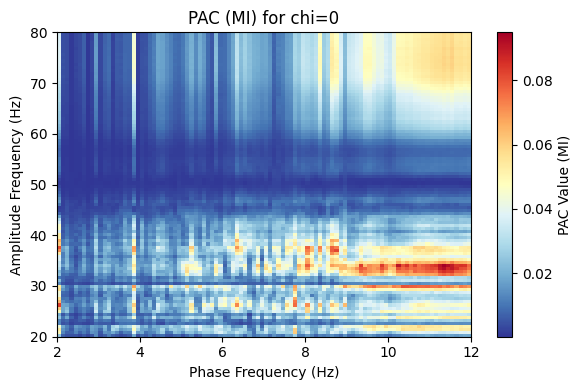

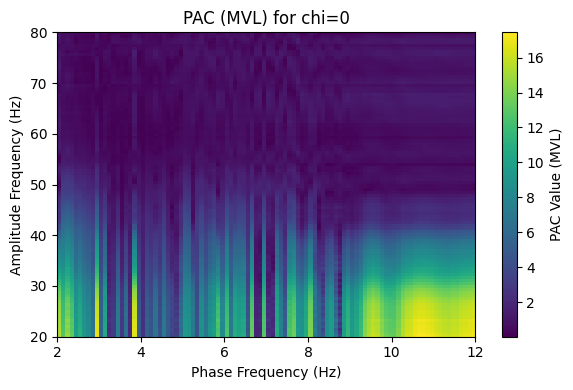

PAC (MI) for chi=0: [[0.02561137 0.00672624 0.00429285 ... 0.017663   0.01903829 0.01843941]
 [0.04926718 0.01294443 0.00701808 ... 0.0385752  0.03762029 0.03951439]
 [0.05330503 0.01533671 0.01058465 ... 0.0545646  0.05371541 0.05420101]
 ...
 [0.03753871 0.00420601 0.003718   ... 0.05520508 0.05418546 0.05501007]
 [0.0372191  0.00405019 0.00370749 ... 0.05511818 0.05405506 0.05479506]
 [0.0373068  0.00391436 0.00374687 ... 0.05542831 0.0543266  0.05499897]]


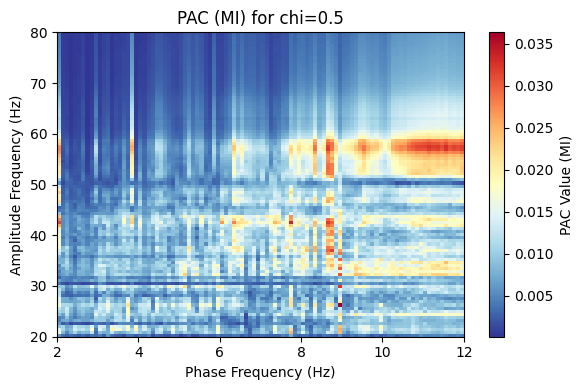

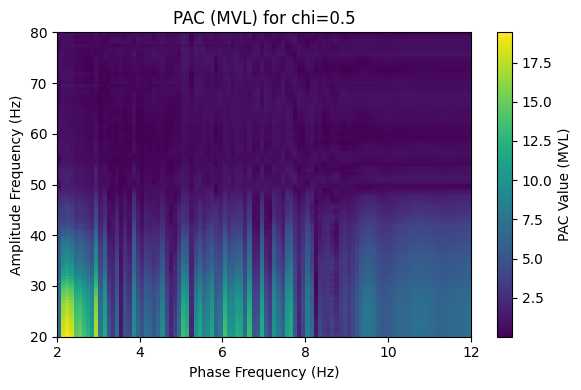

PAC (MI) for chi=0.5: [[0.00610273 0.00338349 0.00265898 ... 0.00445165 0.00494908 0.00439382]
 [0.0168144  0.00842138 0.00488612 ... 0.01105711 0.0095748  0.01081441]
 [0.01484903 0.01088437 0.0075404  ... 0.0120257  0.01137822 0.0122892 ]
 ...
 [0.00445695 0.00057588 0.00044257 ... 0.00677459 0.00662419 0.00664538]
 [0.00436918 0.00054859 0.0004497  ... 0.00665895 0.00651914 0.00653588]
 [0.00431544 0.00052063 0.00045052 ... 0.0066034  0.00646585 0.00646987]]


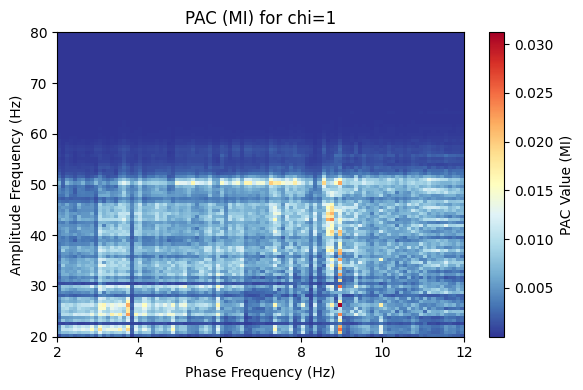

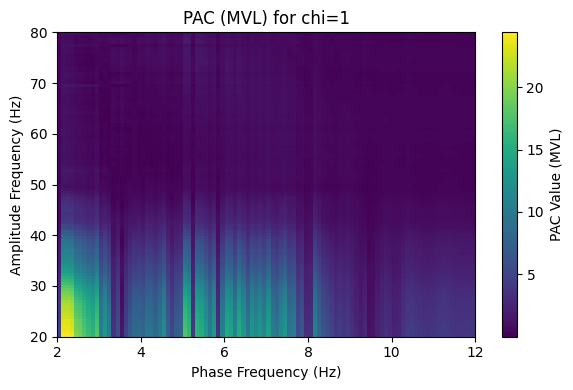

PAC (MI) for chi=1: [[1.27388679e-03 2.87821355e-03 2.63470139e-03 ... 2.24530754e-03
  2.13751652e-03 1.64088788e-03]
 [5.54339135e-03 7.60363694e-03 7.55261364e-03 ... 4.27641891e-03
  2.81837302e-03 3.53761966e-03]
 [4.70145568e-03 1.04944274e-02 1.02737933e-02 ... 4.25747421e-03
  3.35708135e-03 4.04495112e-03]
 ...
 [1.90889300e-05 1.58645922e-05 1.13359760e-05 ... 5.32494018e-05
  5.51849495e-05 5.12289583e-05]
 [1.98347456e-05 1.54210690e-05 1.27875641e-05 ... 3.46494760e-05
  4.01327984e-05 3.76556196e-05]
 [2.05202765e-05 1.49055617e-05 1.28898664e-05 ... 3.51204803e-05
  4.18241161e-05 3.80476344e-05]]


In [39]:
# Define parameters
fs = 500  # Sampling frequency (Hz)
duration = 1  # Duration in seconds
f_phase = 10  # Phase frequency (Hz)
f_amp = 50  # Amplitude frequency (Hz)
k_p = 100  # Phase gain
k_a = 100  # Amplitude gain
sigma_n = 0  # Noise standard deviation
chi_values = [0, 0.5, 1]  # Values of chi (coupling factor)

# Generate signals and compute PAC for different chi values
for chi in chi_values:
    t, x_p, x_a = generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi)

    # Compute time-frequency matrices
    freq_phase_range = (2, 12)
    freq_amp_range = (20, 80)

    # Compute time-frequency matrices for MVL method
    phi_matrix, amp_matrix, _, _, _ = compute_time_freq_matrices(x_p, x_a, fs, freq_phase_range, freq_amp_range)

    # Compute PAC using MVL method
    pac_mvl = compute_pac_mvl(phi_matrix, amp_matrix)

    # Compute PAC using MI method
    pac_mi = compute_pac_mi(phi_matrix, amp_matrix)

    # Plot PAC heatmap for MI method

    plt.figure(figsize=(6, 4))
    plt.imshow(pac_mi, aspect='auto', cmap='RdYlBu_r', origin='lower',
               extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
    plt.colorbar(label='PAC Value (MI)')
    plt.title(f'PAC (MI) for chi={chi}')
    plt.xlabel('Phase Frequency (Hz)')
    plt.ylabel('Amplitude Frequency (Hz)')
    plt.tight_layout()
    plt.show()

    # Display the results
    # Plot the PAC matrix for MVL
    plt.figure(figsize=(6, 4))
    plt.imshow(
    pac_mvl,
    aspect='auto',
    extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]],
)
    plt.colorbar(label='PAC Value (MVL)')
    plt.title(f'PAC (MVL) for chi={chi}')
    plt.xlabel('Phase Frequency (Hz)')
    plt.ylabel('Amplitude Frequency (Hz)')
    plt.tight_layout()
    plt.show()

    print(f'PAC (MI) for chi={chi}: {pac_mi}')

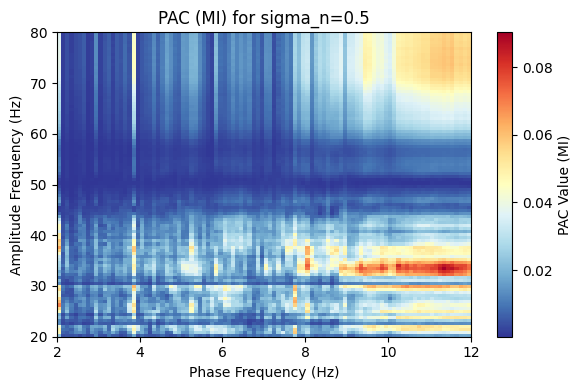

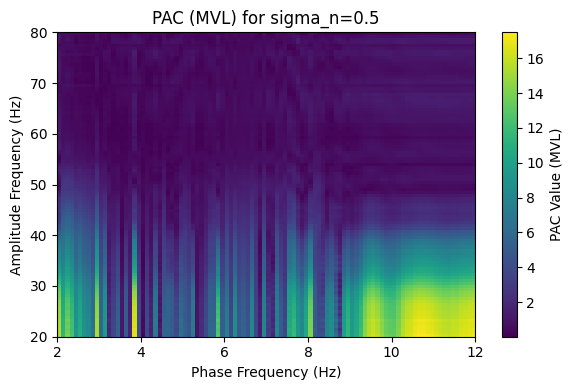

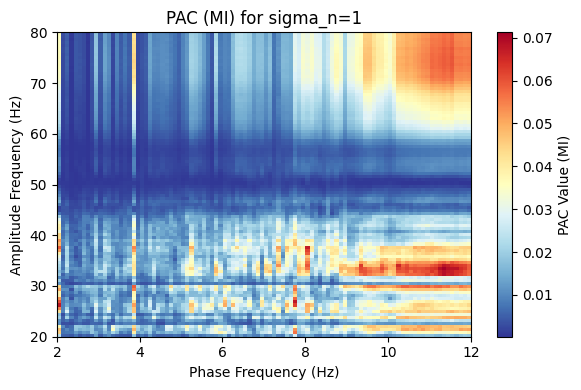

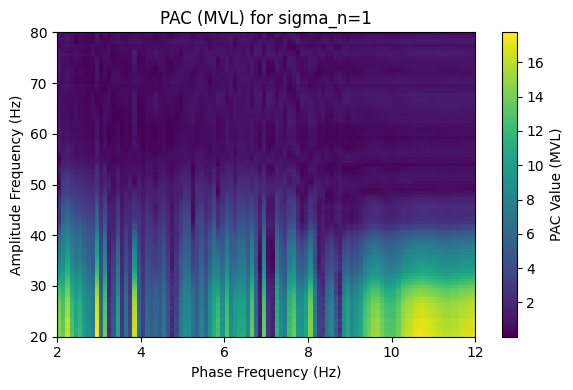

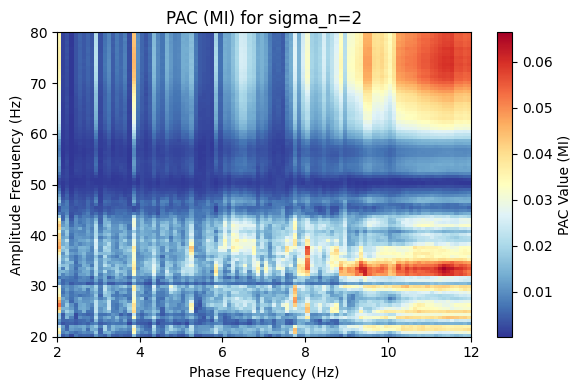

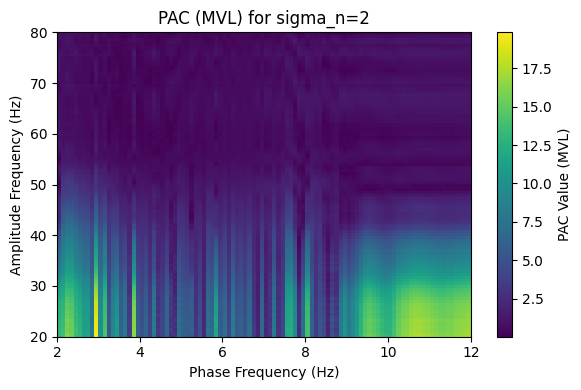

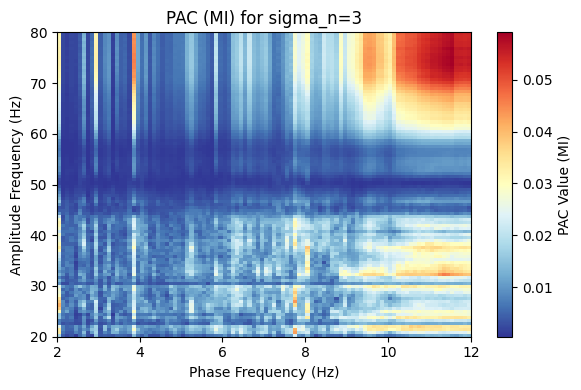

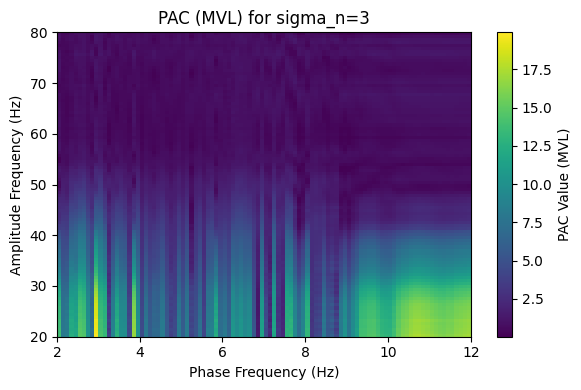

In [44]:
# Define parameters
fs = 500  # Sampling frequency (Hz)
duration = 1  # Duration in seconds
f_phase = 10  # Phase frequency (Hz)
f_amp = 50  # Amplitude frequency (Hz)
k_p = 100  # Phase gain
k_a = 100  # Amplitude gain
sigma_n_values = [0.5, 1, 2, 3]  # Noise standard deviation
chi = 0

# Generate signals and compute PAC for different chi values
for sigma_n in sigma_n_values:
    t, x_p, x_a = generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi)

    # Compute time-frequency matrices
    freq_phase_range = (2, 12)
    freq_amp_range = (20, 80)

    # Compute time-frequency matrices for MVL method
    phi_matrix, amp_matrix, _, _, _ = compute_time_freq_matrices(x_p, x_a, fs, freq_phase_range, freq_amp_range)

    # Compute PAC using MVL method
    pac_mvl = compute_pac_mvl(phi_matrix, amp_matrix)

    # Compute PAC using MI method
    pac_mi = compute_pac_mi(phi_matrix, amp_matrix)

    # Plot PAC heatmap for MI method

    plt.figure(figsize=(6, 4))
    plt.imshow(pac_mi, aspect='auto', cmap='RdYlBu_r', origin='lower',
               extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
    plt.colorbar(label='PAC Value (MI)')
    plt.title(f'PAC (MI) for sigma_n={sigma_n}')
    plt.xlabel('Phase Frequency (Hz)')
    plt.ylabel('Amplitude Frequency (Hz)')
    plt.tight_layout()
    plt.show()

    # Display the results
    # Plot the PAC matrix for MVL
    plt.figure(figsize=(6, 4))
    plt.imshow(
    pac_mvl,
    aspect='auto',
    extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]],
)
    plt.colorbar(label='PAC Value (MVL)')
    plt.title(f'PAC (MVL) for sigma_n={sigma_n}')
    plt.xlabel('Phase Frequency (Hz)')
    plt.ylabel('Amplitude Frequency (Hz)')
    plt.tight_layout()
    plt.show()


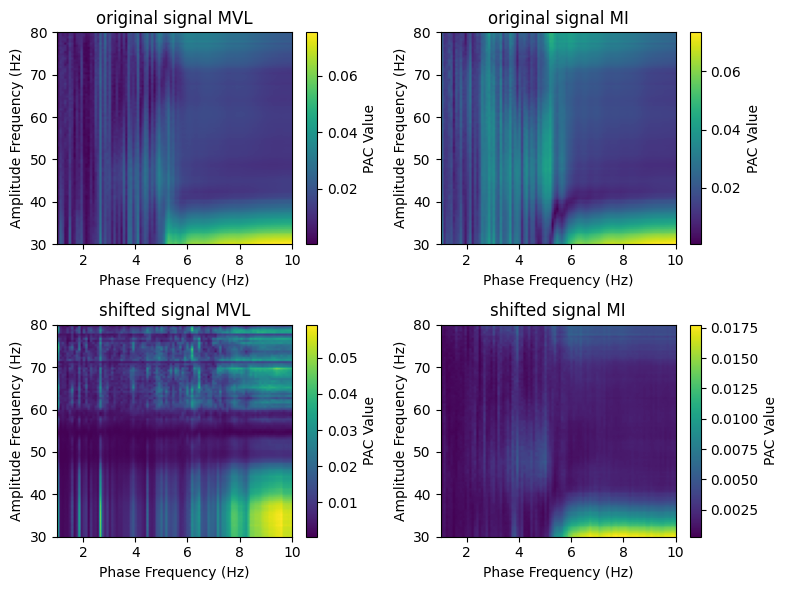

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet2

# Parameters
fs = 500  # Sampling frequency (Hz)
duration = 2  # Duration of the signal (seconds)
f_phase = 5  # Phase frequency (Hz)
f_amp = 60  # Amplitude frequency (Hz)
k_p = 1  # Phase amplitude
k_a = 1  # Amplitude coefficient
sigma_n = 0.5  # Noise level
chi = 0  # Coupling strength (0 means no coupling)

# Generate the signals
t, x_p, x_a = generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi)

# Circularly shift x_p by 100 ms (0.1 seconds)
shift_samples = int(100e-3 * fs)  # Convert 100 ms to samples
x_p_shifted = np.roll(x_p, shift_samples)

# Compute time-frequency matrices for both signals (shifted and original)
phi_matrix_p, amp_matrix_a, time, freqs_phase, freqs_amp = compute_time_freq_matrices(x_p, x_a, fs, [1, 10], [30, 80])
phi_matrix_p_shifted, amp_matrix_a_shifted, time, freqs_phase, freqs_amp = compute_time_freq_matrices(x_p_shifted, x_a, fs, [1, 10], [30, 80])

# Compute PAC using MVL method
pac_mvl = compute_pac_mvl(phi_matrix_p, amp_matrix_a)
pac_mvl_shifted = compute_pac_mvl(phi_matrix_p_shifted, amp_matrix_a_shifted)

# Compute PAC using MI method
pac_mi = compute_pac_mi(phi_matrix, amp_matrix)
pac_mi_shifted = compute_pac_mi(phi_matrix_p_shifted, amp_matrix_a_shifted)

# Plot the comodulogram for the original and shifted signals
plt.figure(figsize=(8, 6))

# Plot the original signal MVL
plt.subplot(2, 2, 1)
plt.imshow(pac_mvl, aspect='auto', cmap='viridis', extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
plt.colorbar(label='PAC Value')
plt.title('original signal MVL')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
# Plot the original signal MI
plt.subplot(2, 2, 2)
plt.imshow(pac_mvl_shifted, aspect='auto', cmap='viridis', extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
plt.colorbar(label='PAC Value')
plt.title('original signal MI')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')

# Plot the shifted signal MVL
plt.subplot(2, 2, 3)
plt.imshow(pac_mi, aspect='auto', cmap='viridis', extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
plt.colorbar(label='PAC Value')
plt.title('shifted signal MVL')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')
# Plot the shifted signal MI
plt.subplot(2, 2, 4)
plt.imshow(pac_mi_shifted, aspect='auto', cmap='viridis', extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]])
plt.colorbar(label='PAC Value')
plt.title('shifted signal MI')
plt.xlabel('Phase Frequency (Hz)')
plt.ylabel('Amplitude Frequency (Hz)')

plt.tight_layout()
plt.show()


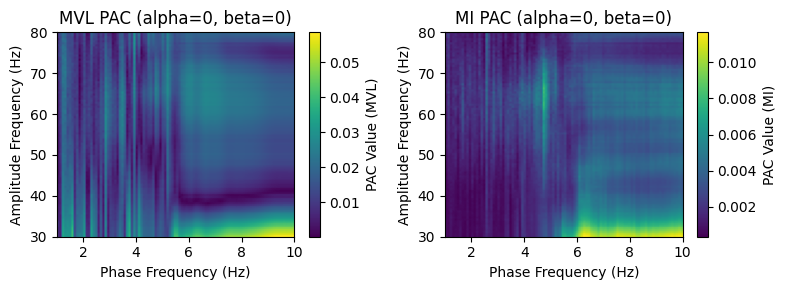

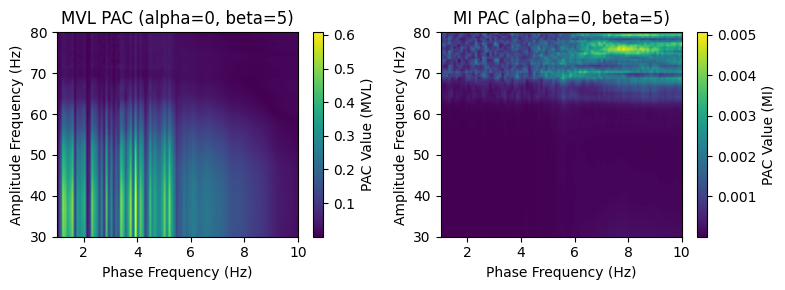

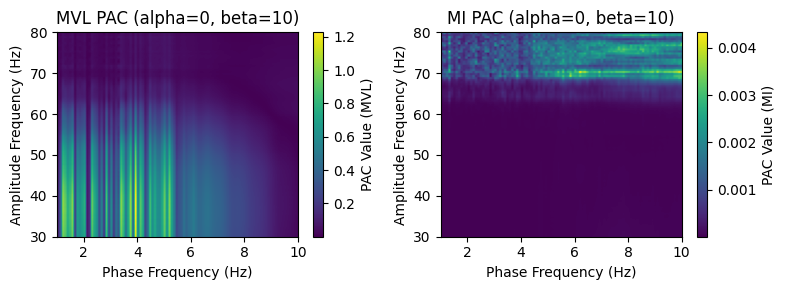

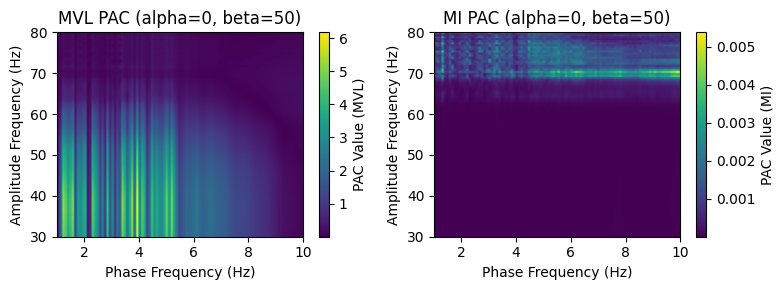

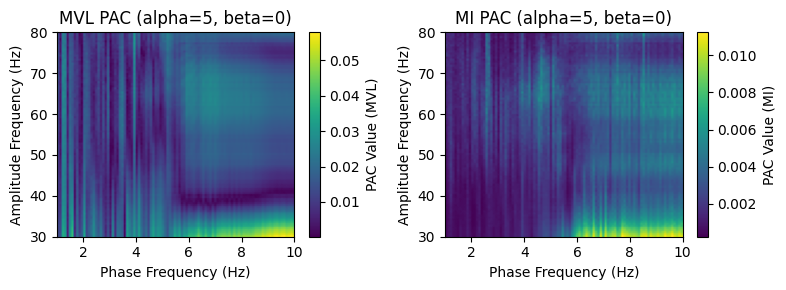

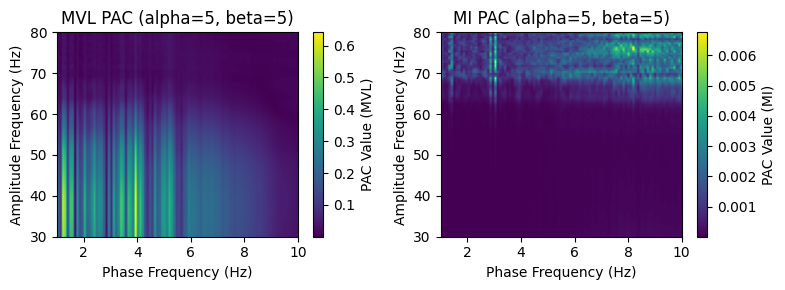

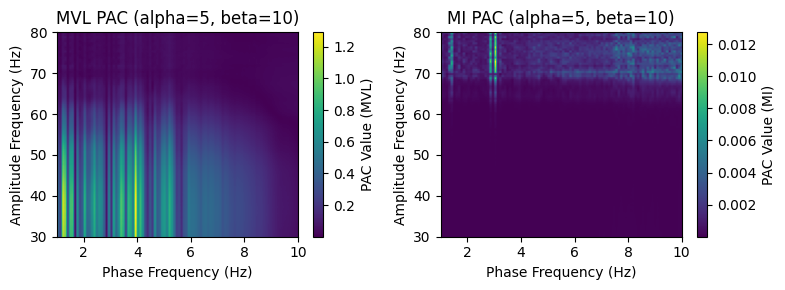

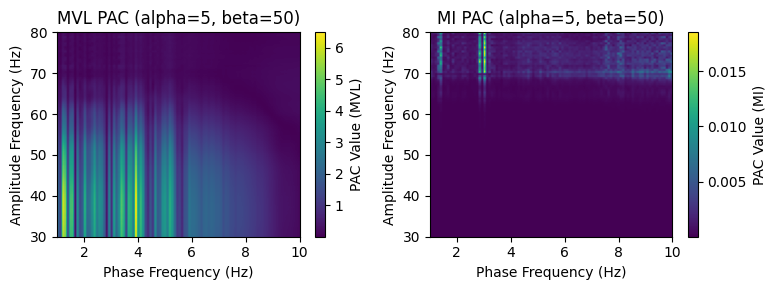

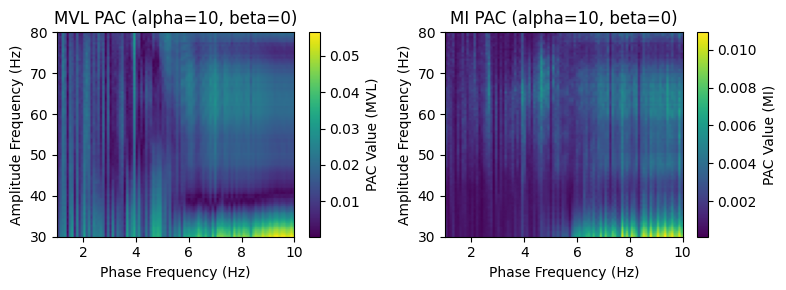

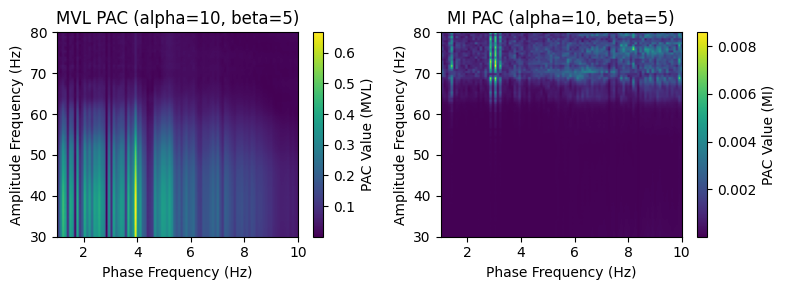

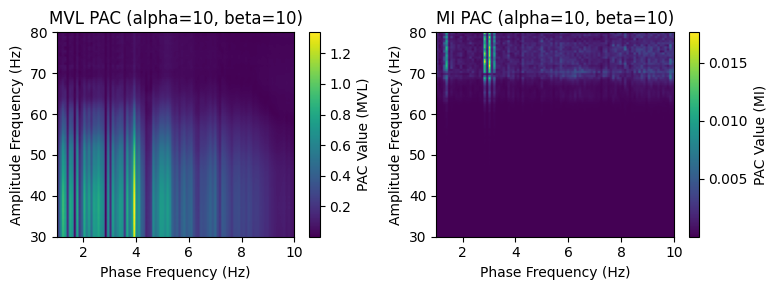

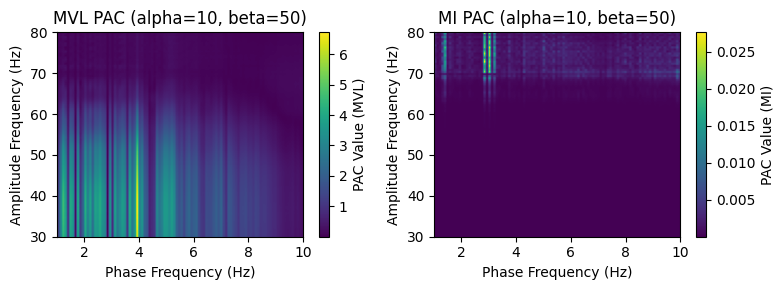

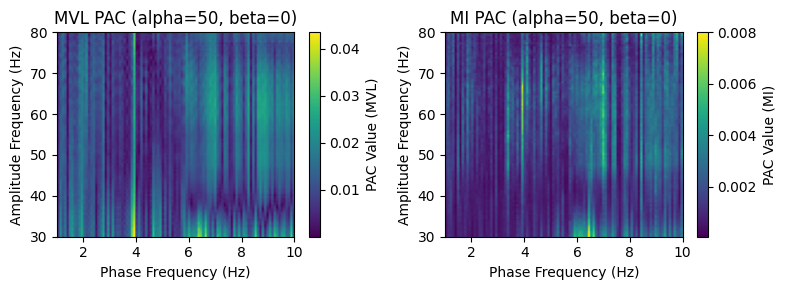

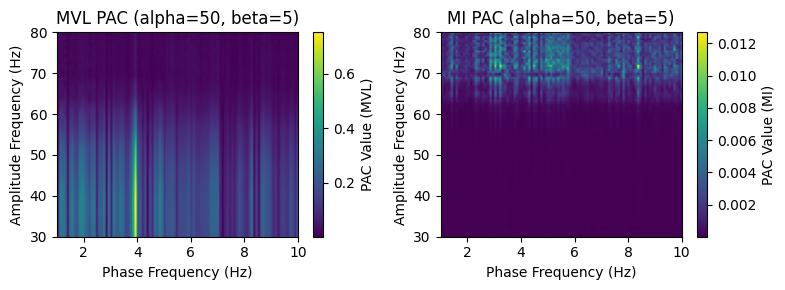

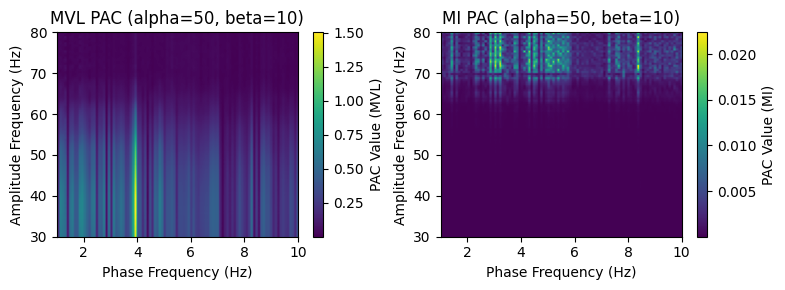

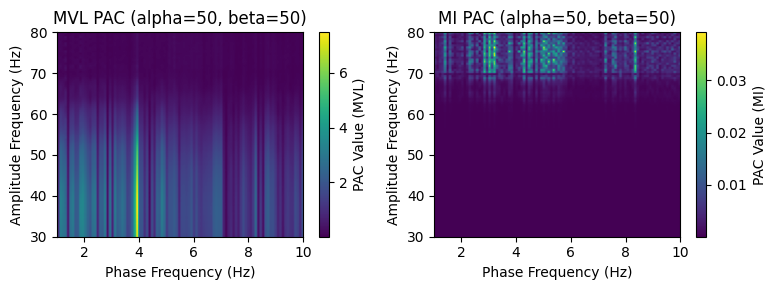

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
fs = 500  # Sampling frequency (Hz)
duration = 2  # Duration of the signal (seconds)
f_phase = 5  # Phase frequency (Hz)
f_amp = 60  # Amplitude frequency (Hz)
k_p = 1  # Phase amplitude
k_a = 1  # Amplitude coefficient
sigma_n = 0.5  # Noise level
chi = 0  # Coupling strength (0 means no coupling)
f_cs = 40  # Frequency of common source (Hz)
alpha_values = [0, 5, 10, 50]  # Alpha values for common source
beta_values = [0, 5, 10, 50]  # Beta values for common source

# Generate the base signals
t, x_p, x_a = generate_pac_signals(fs, duration, f_phase, f_amp, k_p, k_a, sigma_n, chi)

# Time vector
time = np.linspace(0, duration, int(fs * duration), endpoint=False)

# Loop over alpha and beta values
for alpha in alpha_values:
    for beta in beta_values:
        # Add the common source component
        x_p_prime = x_p + alpha * np.cos(2 * np.pi * f_cs * time)
        x_a_prime = x_a + beta * np.cos(2 * np.pi * f_cs * time)

        # Compute time-frequency matrices
        phi_matrix_p_prime, amp_matrix_a_prime, _, freqs_phase, freqs_amp = compute_time_freq_matrices(
            x_p_prime, x_a_prime, fs, [1, 10], [30, 80]
        )

        # Compute PAC using MVL
        pac_mvl = compute_pac_mvl(phi_matrix_p_prime, amp_matrix_a_prime)

        # Compute PAC using MI
        pac_mi = compute_pac_mi(phi_matrix_p_prime, amp_matrix_a_prime)

        # Plot the PAC results
        plt.figure(figsize=(8, 3))

        # MVL heatmap
        plt.subplot(1, 2, 1)
        plt.imshow(
            pac_mvl,
            aspect='auto',
            cmap='viridis',
            extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]],
        )
        plt.colorbar(label='PAC Value (MVL)')
        plt.title(f'MVL PAC (alpha={alpha}, beta={beta})')
        plt.xlabel('Phase Frequency (Hz)')
        plt.ylabel('Amplitude Frequency (Hz)')

        # MI heatmap
        plt.subplot(1, 2, 2)
        plt.imshow(
            pac_mi,
            aspect='auto',
            cmap='viridis',
            extent=[freqs_phase[0], freqs_phase[-1], freqs_amp[0], freqs_amp[-1]],
        )
        plt.colorbar(label='PAC Value (MI)')
        plt.title(f'MI PAC (alpha={alpha}, beta={beta})')
        plt.xlabel('Phase Frequency (Hz)')
        plt.ylabel('Amplitude Frequency (Hz)')

        plt.tight_layout()
        plt.show()
